In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, ShuffleSplit

# Setup

In [2]:
# Función óptima
def f(x):
    return np.exp(x)

In [3]:
# Tamaño de la muestra
N = 100

# Error irreducible
sigma_epsilon = 1

# Máximo de x
x_max = 2

# Punto para test
x_test = 1

# Vector de valores de x
x = x_max * (2 * np.random.rand(N) - 1)

# Ruido
epsilon = sigma_epsilon * np.random.randn(N)

# Función verdadera + ruido
y = f(x) + epsilon

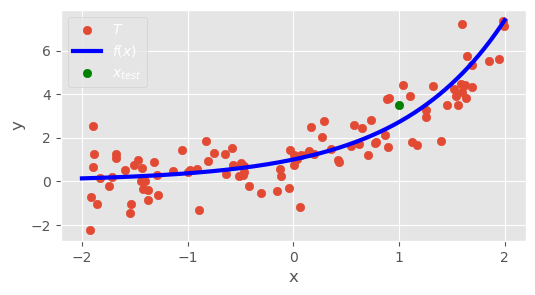

In [4]:
# Scatter plot
plt.figure(figsize=(6, 3))
x_range = np.linspace(-x_max, x_max, 1000)
plt.scatter(x, y, label=r'$T$')
plt.plot(x_range, f(x_range), 'b', linewidth=3.0, label=r'$f(x)$')
# Valor de la etiqueta en test
y_test = f(x_test) + sigma_epsilon * np.random.randn()
plt.scatter(x_test, y_test, c='g', label=r'$x_{test}$')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(-x_max, x_max + 1))
plt.legend()
plt.show()

# Predicciones en un x fijo

<div style=" border-left: 6px solid #28a745; padding: 10px; border-radius: 5px;">
 
 ## Pregunta 1: Fijar distintos valores de xtest

 Al fijar distintos valores de xtest y analizar la distribución de las predicciones en ese punto, lo que estamos observando es la **varianza del modelo en ese punto**


</div>

In [5]:
def plot_x_test_predictions_histograma(y_hat_test, x_test, depth_list):
    # Graficamos los resultados en un histograma
    
    # Calculamos la predicción promedio y su desvío
    y_hat_test_mean = np.mean(y_hat_test, 1)

    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(12,6))

    for k in range(len(depth_list)):
        axs[k].hist(y_hat_test[k], density=True, color='tab:green', alpha=0.6)
        xlim = axs[k].get_xlim()
        axs[k].axvline(x=f(x_test), color='r', linewidth=3.0)
        axs[k].axvline(x=y_hat_test_mean[k], color='k', linewidth=3.0)
        axs[k].title.set_text('d = {}'.format(depth_list[k]))
        axs[k].legend([r'$f(x_{test})$', r'$\boldsymbol{E}_T[h_T(x_{test})]$', r'$h_T(x_{test})$'], fontsize=12)

    for k in range(len(depth_list)):
        x_range = np.linspace(xlim[0], xlim[1], 1000)
        kde = stats.gaussian_kde(y_hat_test[k])
        axs[k].plot(x_range, kde(x_range), color='tab:green', ls='--')

    plt.suptitle(rf'Histograma de $h_T(x_{{test}}={x_test:.2f})$', size=12)
    plt.show()

def plot_x_test_predictions_boxplot(y_hat_test):
    plt.boxplot(y_hat_test.T, showfliers=False)
    plt.axhline(y=f(x_test), color='r')
    plt.xlabel('max_depth', size=12)
    plt.ylabel(r'$h_T(x_{test})$', size=12)
    plt.xticks([1,2], [1, 'None'])
    plt.title(r'Boxplot de $h_T(x_{test})$')
    plt.show()

In [6]:
def predict_xtest(x_test, depth_list, R = 10000, N = 100, sigma_epsilon = 1): 
    # Registramos las R predicciones en x_test
    y_hat_test = np.zeros((len(depth_list), R))

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(N) # Ruido
        y = f(x) + epsilon # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Calculamos la predicción
            y_hat_test[k, r] = tree.predict(np.array([[x_test]])).item()
    plot_x_test_predictions_histograma(y_hat_test, x_test, depth_list)
    plot_x_test_predictions_boxplot(y_hat_test)

100%|██████████| 10000/10000 [00:08<00:00, 1146.41it/s]


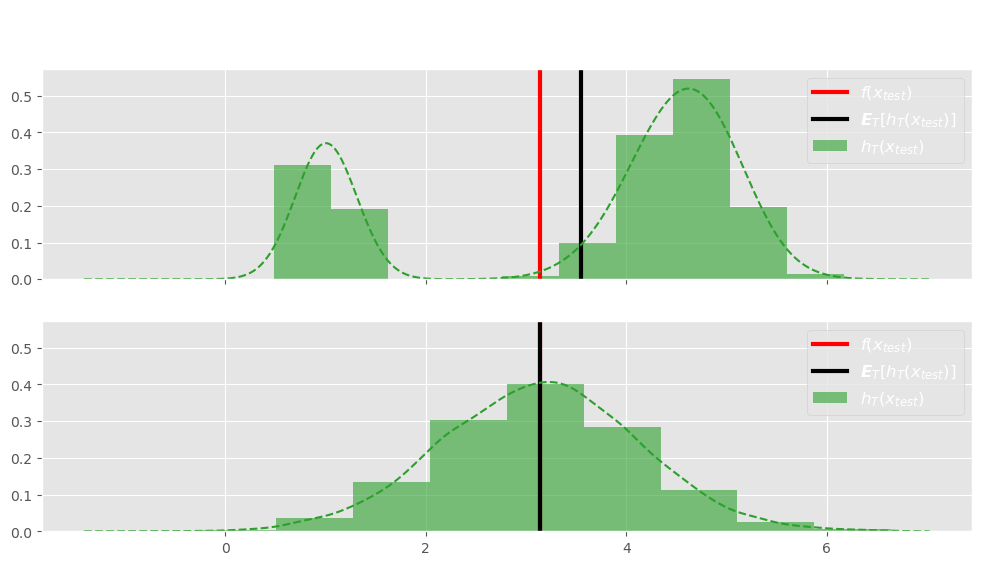

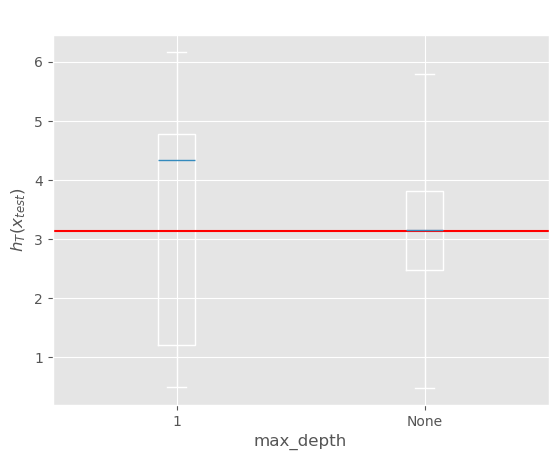

100%|██████████| 10000/10000 [00:08<00:00, 1209.39it/s]


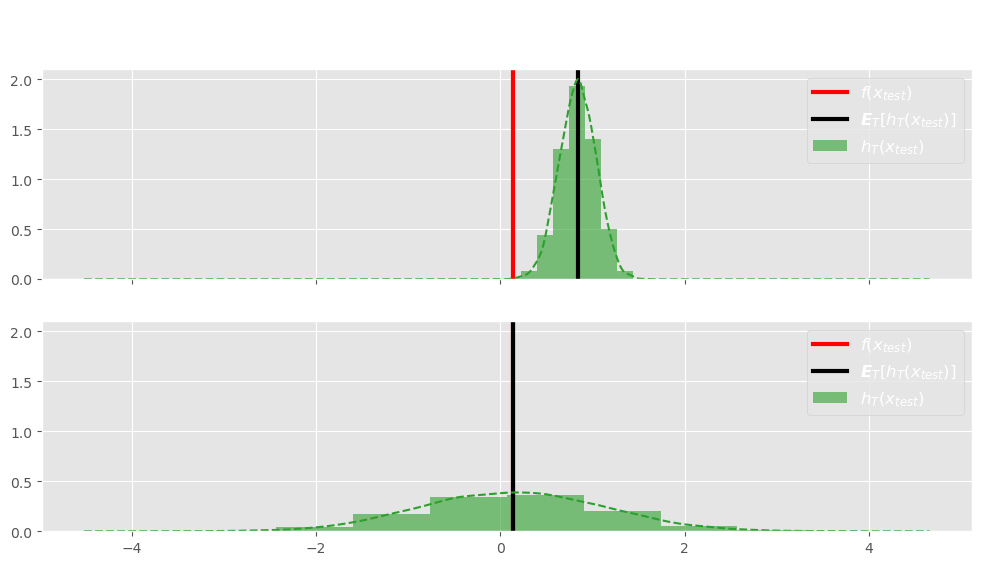

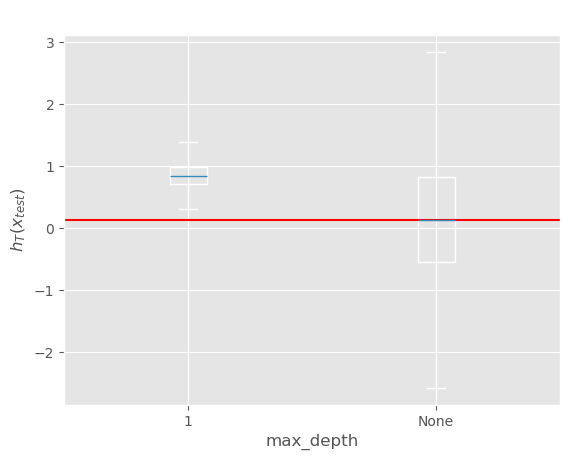

100%|██████████| 10000/10000 [00:08<00:00, 1147.73it/s]


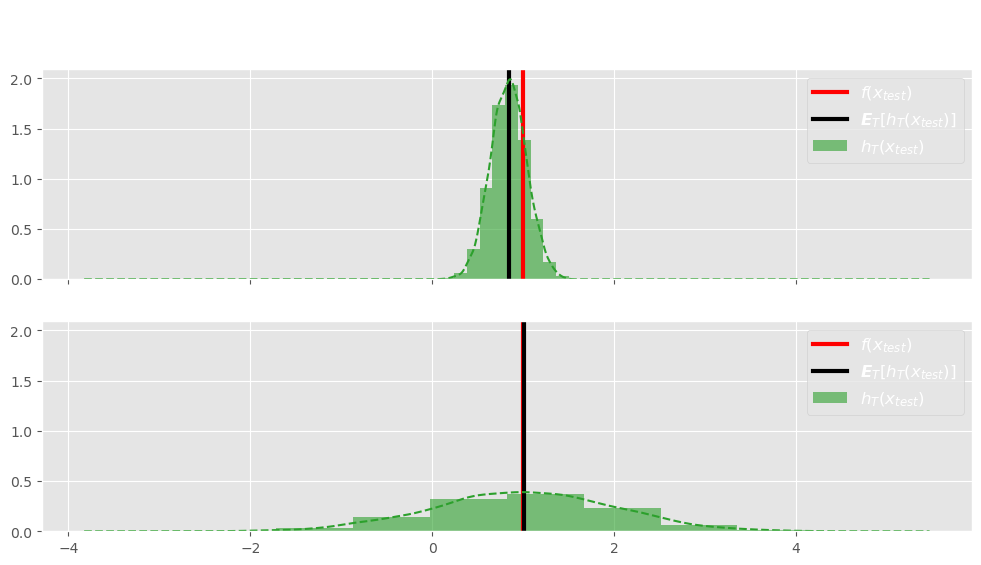

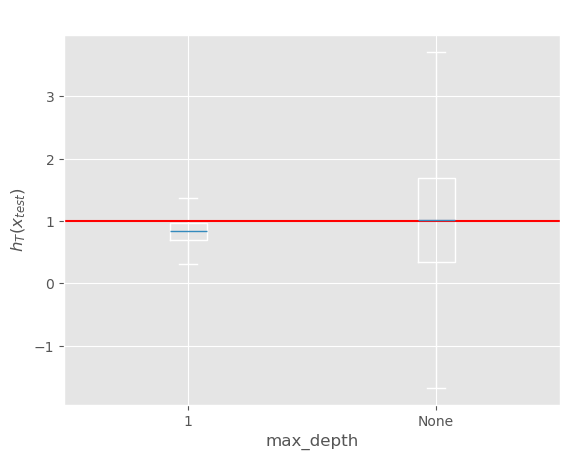

100%|██████████| 10000/10000 [00:08<00:00, 1203.79it/s]


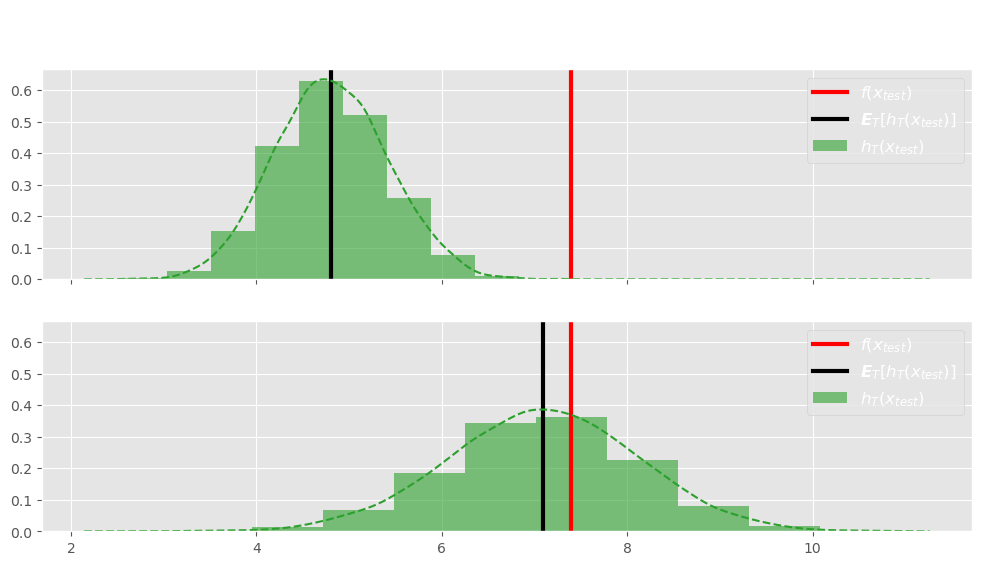

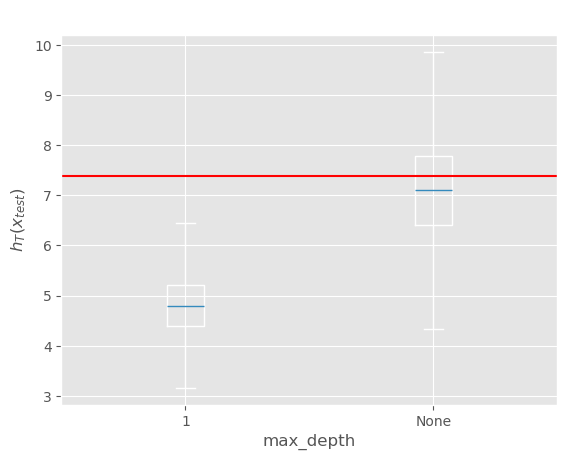

100%|██████████| 10000/10000 [00:07<00:00, 1300.35it/s]


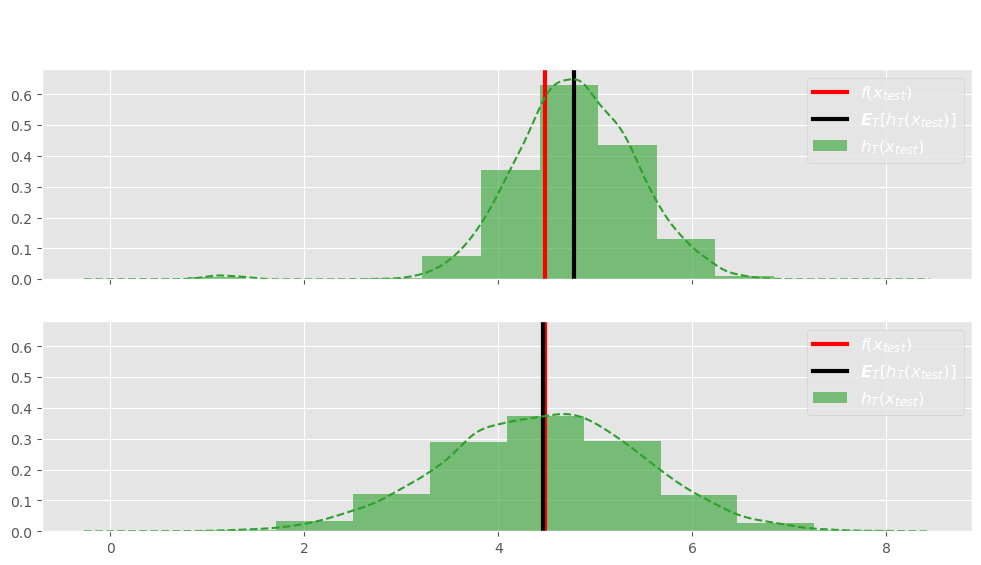

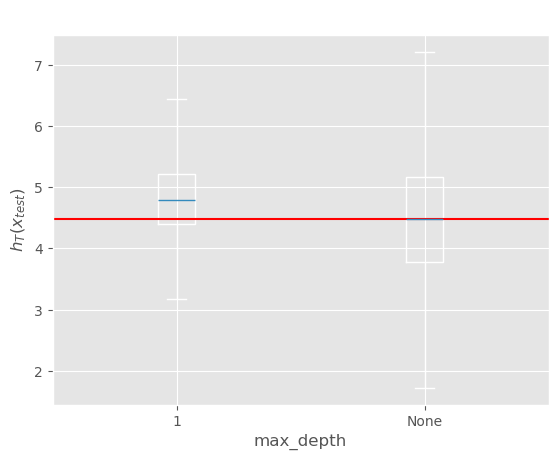

100%|██████████| 10000/10000 [00:07<00:00, 1293.73it/s]


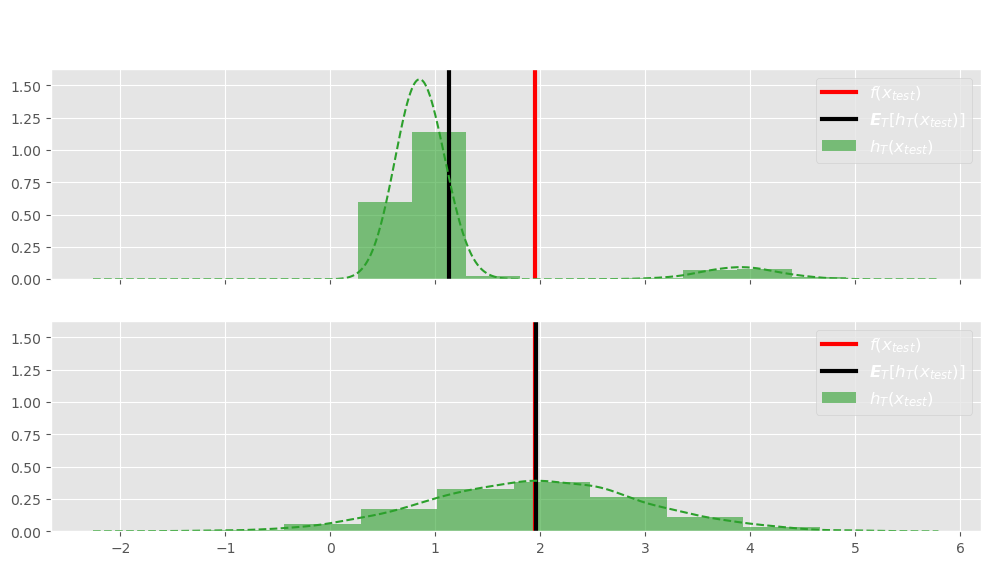

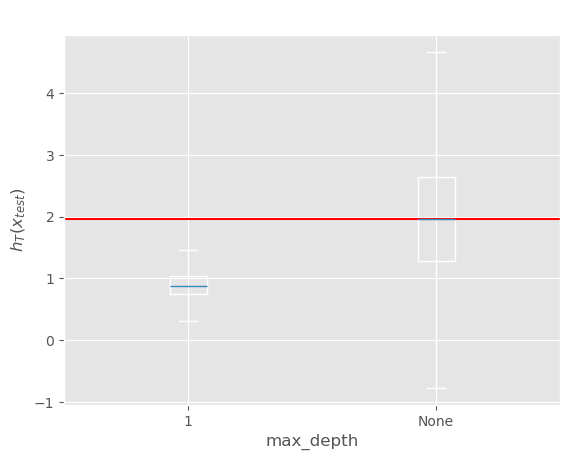

In [7]:
# R datasets
R = 10000

x_test_random = x_max * (2 * np.random.rand() - 1)

# Fijar distintos valores de x_test
x_test_values = [x_test_random, -2, 0, 2, 1.5, 0.67]

# max_depth de los árboles
depth_list = [1, None]

for x_test in x_test_values:
    y_hat_test = predict_xtest(x_test, depth_list, R)


## Análisis

En esta sección se analizaron las predicciones del modelo en diferentes valores fijos de x_test utilizando dos árboles de decisión: uno simple (con profundidad limitada d=1) y otro complejo (sin restricción de profundidad, d=None). El objetivo fue observar cómo cambia el comportamiento del modelo en distintas regiones del dominio y cómo esto se refleja en el sesgo y la varianza de sus predicciones.

- x_test = -2.00

Este valor se encuentra en un extremo del dominio, donde suele haber menos datos y más variación en la función. El árbol simple mostró predicciones muy estables pero desviadas del valor real (alto sesgo), mientras que el árbol complejo presentó una mayor dispersión (alta varianza), aunque su promedio se acercó más a la verdadera función.

- x_test = 0.00

Este punto se encuentra en el centro del dominio, donde hay más datos y la función tiende a ser más suave. Ambos modelos lograron buenos resultados: baja varianza y bajo sesgo. El modelo simple, a pesar de sus limitaciones, logró aproximarse correctamente.

- x_test = 0.67

A medida que nos alejamos del centro, el sesgo del modelo simple empieza a notarse más, prediciendo consistentemente por debajo del valor real. El modelo complejo, en cambio, muestra predicciones más dispersas, pero con un promedio cercano a la función objetivo.

- x_test = 1.50

El comportamiento observado refuerza la tendencia: el modelo simple sigue presentando sesgo, mientras que el complejo ofrece un promedio más ajustado, aunque con una varianza intermedia. Esto demuestra que, en zonas más lejanas o con más curvatura, el modelo flexible logra mejores resultados en promedio.

- x_test = 2.00

En este caso extremo, el modelo simple tiene un rendimiento muy pobre, con predicciones estables pero claramente incorrectas. Por su parte, el modelo complejo sigue la tendencia de la función de manera más efectiva, aunque con una dispersión importante.

**Conclusión**

Lo que se puede ver en general es que el valor de x_test influye bastante. En el centro (como x=0), los dos modelos hacen buenas predicciones. Pero cuando x_test está más lejos o en zonas donde hay menos datos o la función cambia más, el modelo simple empieza a fallar, mientras que el modelo complejo se adapta mejor, aunque a veces varía mucho entre ejecuciones.

En resumen, el modelo simple tiene menos varianza pero más sesgo, y el complejo es al revés: tiene menos sesgo pero más varianza. Dependiendo del punto que se analice, uno puede rendir mejor que el otro.

<div style=" border-left: 6px solid #28a745; padding: 10px; border-radius: 5px;">
 
 ## Pregunta 2: Aumentar el tamaño del conjunto de datos N

</div>

100%|██████████| 10000/10000 [00:07<00:00, 1250.12it/s]


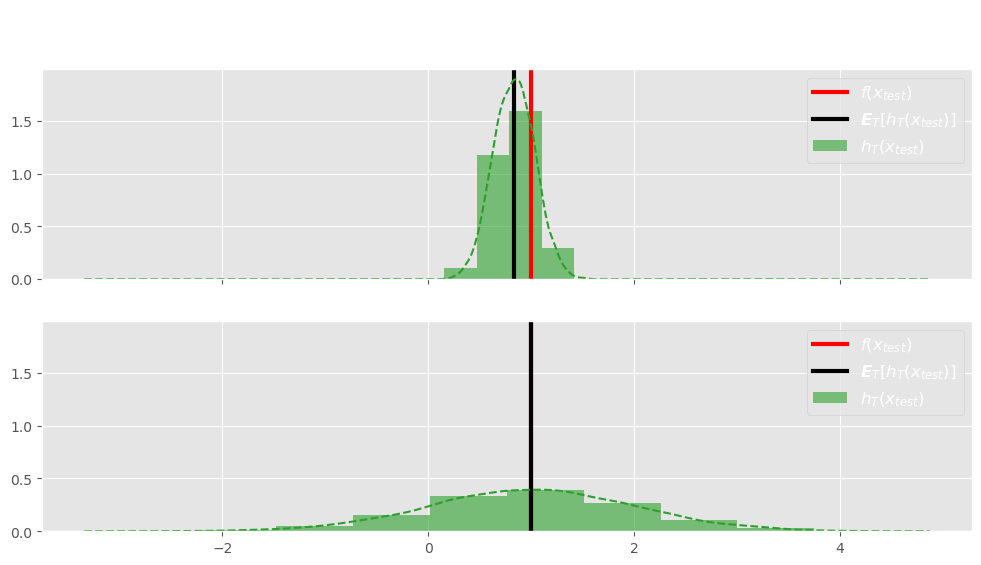

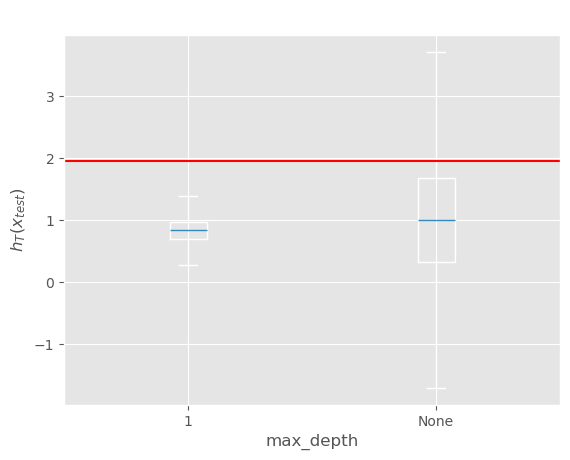

100%|██████████| 10000/10000 [00:13<00:00, 738.59it/s]


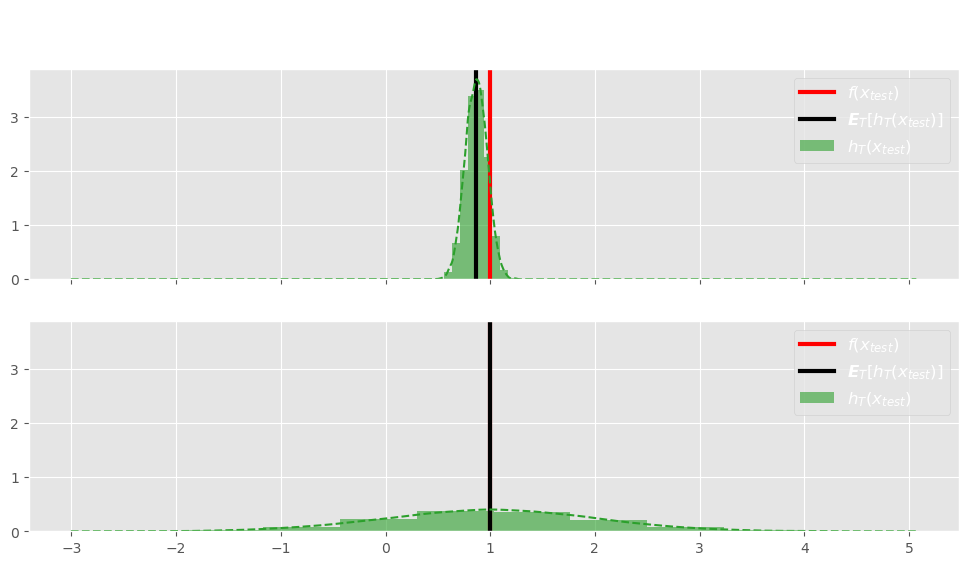

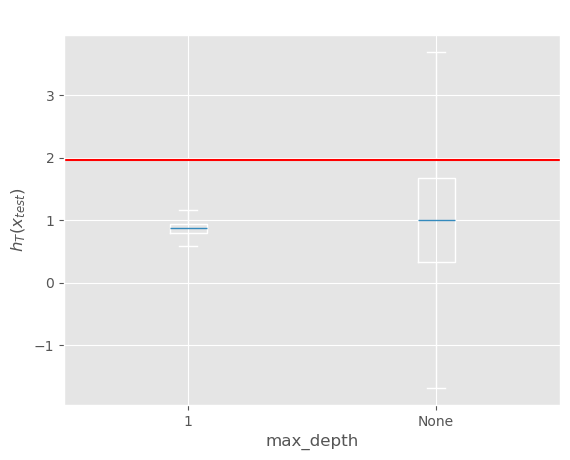

In [8]:
predict_xtest(0, depth_list, R, N = 100)
predict_xtest(0, depth_list, R, N = 500)

## Análisis:

Para analizar qué pasa cuando se aumenta el tamaño del conjunto de entrenamiento, se compararon las predicciones del modelo para x_test = 0 usando dos valores distintos de N: uno con N = 100 y otro con N = 500.

En la primera gráfica (N=100), tanto el modelo simple como el complejo muestran una distribución relativamente estable, pero todavía se nota algo de dispersión, sobre todo en el árbol más profundo (d=None). Cuando se aumenta a N = 500, se puede ver claramente que las predicciones se concentran mucho más: la varianza disminuye en ambos modelos, y las curvas se ajustan más alrededor del valor esperado.

Además, el promedio de las predicciones (línea negra) en ambos casos queda muy cerca del valor real (línea roja), lo que indica que el sesgo también es bajo en este punto.

En base a este comportamiento, podemos concluir que: 

Aumentar N hace que el modelo tenga más información para aprender, y eso se traduce en predicciones más estables. Con más datos, el modelo no depende tanto de la variabilidad del conjunto de entrenamiento, por lo que la varianza baja. Si el modelo tiene suficiente capacidad, también puede mejorar el sesgo.

En este caso, con x_test = 0, se nota claramente que a mayor tamaño de muestra, mejores y más consistentes son las predicciones, especialmente en el modelo más complejo.


<div style=" border-left: 6px solid #28a745; padding: 10px; border-radius: 5px;">
 
 ## Pregunta 3: Variar el error reducible (sigma)

</div>

100%|██████████| 10000/10000 [00:07<00:00, 1256.84it/s]


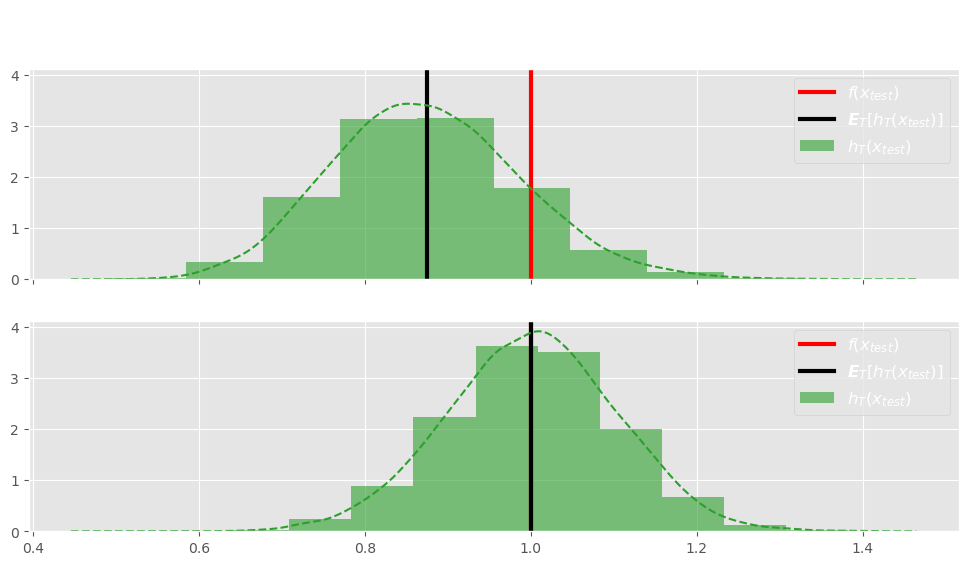

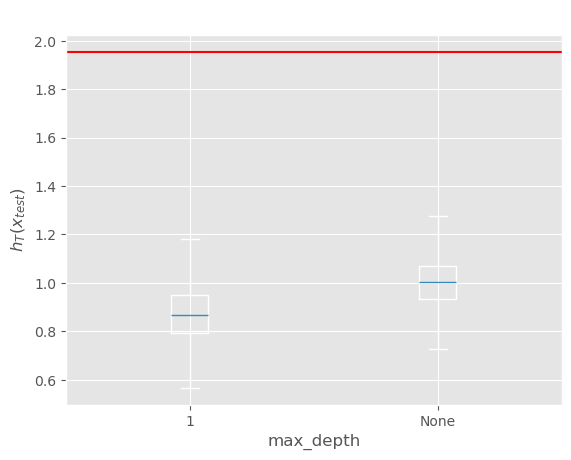

100%|██████████| 10000/10000 [00:08<00:00, 1236.58it/s]


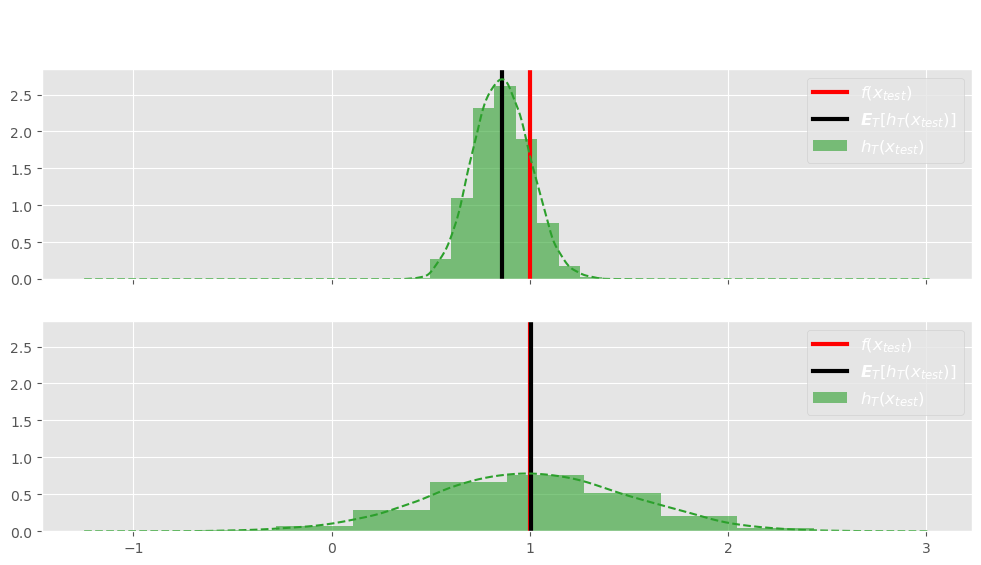

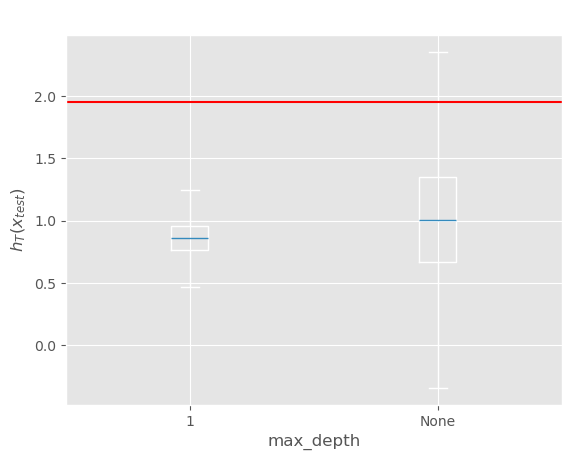

100%|██████████| 10000/10000 [00:08<00:00, 1198.49it/s]


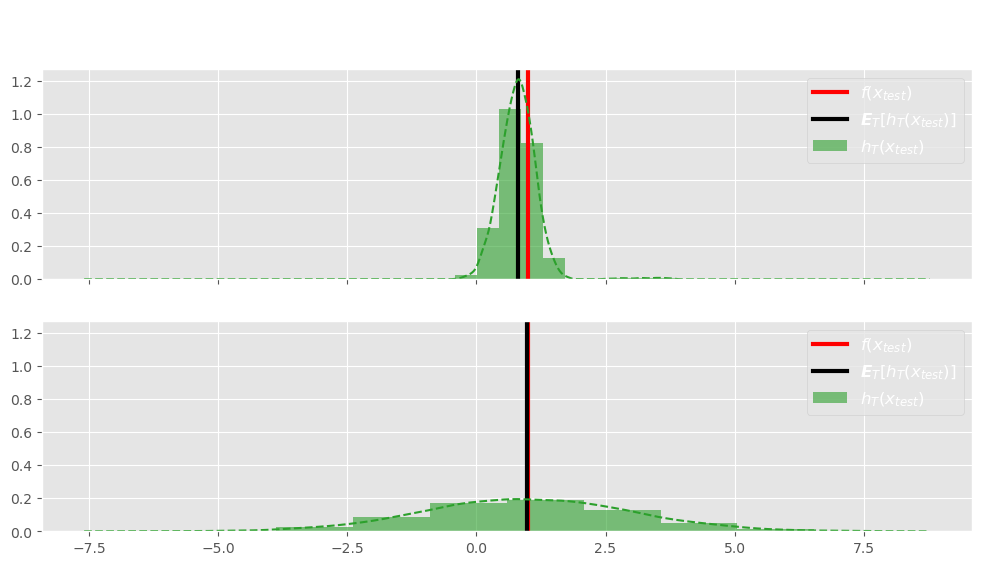

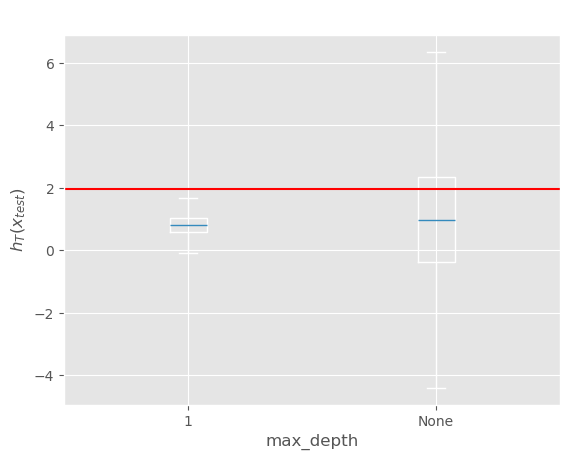

In [9]:
predict_xtest(0, depth_list, R, N, sigma_epsilon = 0.1)
predict_xtest(0, depth_list, R, N, sigma_epsilon = 0.5)
predict_xtest(0, depth_list, R, N, sigma_epsilon = 2)

## Análisis

Para esta parte del trabajo se evaluó cómo cambian las predicciones del modelo cuando se aumenta el valor de sigma, que representa el nivel de ruido en los datos (error irreducible). Se eligió un valor fijo de x_test = 0.0 y se compararon los resultados para tres valores de sigma: 0.1, 0.5 y 2.

- sigma = 0.1 (bajo ruido)

Las predicciones de ambos modelos están bastante concentradas y cercanas al valor real. La varianza es baja, y el promedio de las predicciones también está muy cerca del valor verdadero, sobre todo en el modelo complejo (d=None).

- sigma = 0.5 (ruido moderado)

Se empieza a notar un poco más de dispersión en las predicciones. El modelo complejo sigue manteniéndose cerca del valor real en promedio, pero sus resultados individuales son más variables. El modelo simple también empieza a mostrar más variación, aunque sigue siendo más estable.

- sigma = 2 (alto ruido)

Las distribuciones se vuelven mucho más anchas, especialmente en el modelo complejo. Aunque el promedio de las predicciones (línea negra) sigue alineado con el valor verdadero, las predicciones individuales están muy dispersas. Esto se ve claramente en el histograma del modelo complejo, donde algunas predicciones se alejan bastante (hay valores incluso entre -5 y 10). El modelo simple también presenta más varianza, pero en menor medida.

En base a los resultados obtenidos, podemos concluir que: 

A medida que se aumenta el valor de sigma, las predicciones se vuelven más dispersas y menos confiables, incluso si el promedio sigue siendo correcto. Esto se debe a que el error irreducible afecta directamente la salida, y no hay manera de eliminarlo completamente, ya que es parte del problema.

El aumento del ruido no cambia el sesgo del modelo, pero sí incrementa la varianza del error total. Por eso, aunque el modelo esté bien entrenado, sus predicciones serán más inestables si los datos están muy contaminados por ruido.

En resumen, a mayor sigma, mayor incertidumbre en las predicciones, especialmente en modelos más complejos que son más sensibles a los datos.
